In [177]:
import tensorflow as tf
import tensorflow_probability as tfp
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")


def eval_grads(funcs, x_tensor, name):
    with tf.GradientTape(persistent=True) as tape:
        output = funcs["act"](x_tensor)
        aad_grad = tape.gradient(output, x_tensor)
        aad_grad2 = tape.gradient(aad_grad, x_tensor)
    fig, ax = plt.subplots()
    sns.lineplot(x=x, y=funcs["act"](x), label=f"{name}")
    sns.lineplot(x=x, y=funcs["grad"](x), label=f"{name}_derivative")
    sns.lineplot(x=x, y=funcs["grad2"](x), label=f"{name}_second_derivative")
    assert np.allclose(aad_grad, funcs["grad"](x))
    assert np.allclose(aad_grad2, funcs["grad2"](x))


x = np.linspace(-3, 3, 200)
x_tensor = tf.Variable(x)

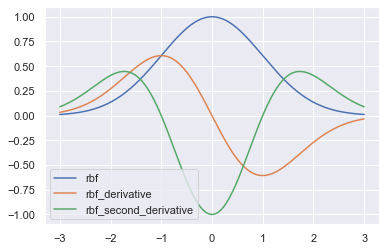

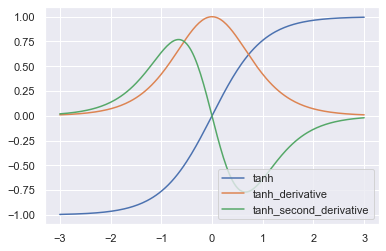

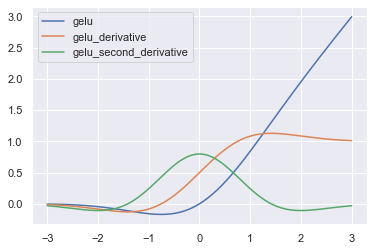

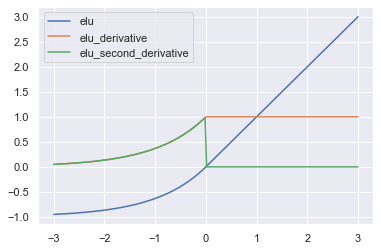

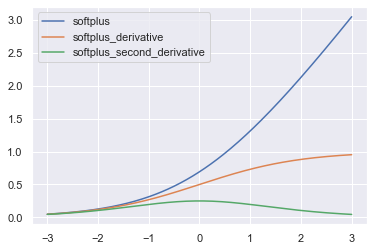

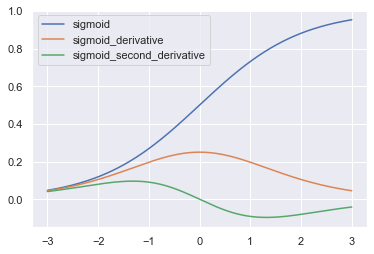

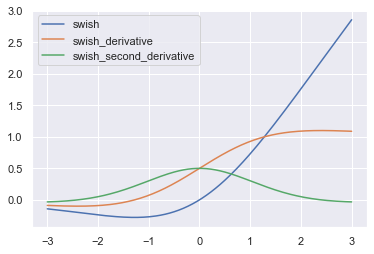

In [178]:
def rbf(x):
    return tf.math.exp(-0.5 * (x ** 2))


def analytic_rbf_grad(x):
    return -x * tf.math.exp(-0.5 * (x ** 2))


def analytic_rbf_second_grad(x):
    return (x ** 2 - 1.0) * tf.math.exp(-0.5 * (x ** 2))


funcs = {"act": rbf, "grad": analytic_rbf_grad, "grad2": analytic_rbf_second_grad}


eval_grads(funcs, x_tensor, name="rbf")


def analytic_tanh_grad(x):
    return 4.0 / (tf.math.exp(x) + tf.math.exp(-x)) ** 2


def analytic_tanh_second_grad(x):
    return -2.0 * analytic_tanh_grad(x) * tf.keras.activations.tanh(x)


funcs = {
    "act": tf.keras.activations.tanh,
    "grad": analytic_tanh_grad,
    "grad2": analytic_tanh_second_grad,
}


eval_grads(funcs, x_tensor, name="tanh")


def analytic_gelu_grad(x):
    norm = tfp.distributions.Normal(loc=0, scale=1)
    return norm.cdf(x) + x * norm.prob(x)


def analytic_gelu_second_grad(x):
    norm = tfp.distributions.Normal(loc=0, scale=1)
    return 2 * norm.prob(x) - (x ** 2) * norm.prob(x)


funcs = {
    "act": tf.keras.activations.gelu,
    "grad": analytic_gelu_grad,
    "grad2": analytic_gelu_second_grad,
}


eval_grads(funcs, x_tensor, name="gelu")


def analytic_elu_grad(x, alpha=1.0):
    return (0.5 * (tf.math.sign(x) + 1.0)) - (
        0.5 * (tf.math.sign(x) - 1.0)
    ) * alpha * tf.math.exp(x)


def analytic_elu_second_grad(x, alpha=1.0):
    return -0.5 * (tf.math.sign(x) - 1.0) * alpha * tf.math.exp(x)


funcs = {
    "act": tf.keras.activations.elu,
    "grad": analytic_elu_grad,
    "grad2": analytic_elu_second_grad,
}


eval_grads(funcs, x_tensor, name="elu")


def analytic_softplus_grad(x):
    return tf.keras.activations.sigmoid(x)


def analytic_softplus_second_grad(x, alpha=1.0):
    return (tf.keras.activations.sigmoid(x) ** 2) * tf.math.exp(-x)


funcs = {
    "act": tf.keras.activations.softplus,
    "grad": analytic_softplus_grad,
    "grad2": analytic_softplus_second_grad,
}


eval_grads(funcs, x_tensor, name="softplus")


def analytic_sigmoid_grad(x):
    return tf.math.exp(-x) * (tf.keras.activations.sigmoid(x) ** 2)
    return tf.keras.activations.sigmoid(x) * (1.0 - tf.keras.activations.sigmoid(x))


def analytic_sigmoid_second_grad(x):
    return (1.0 - 2.0 * tf.keras.activations.sigmoid(x)) * analytic_sigmoid_grad(x)


def analytic_sigmoid_second_grad(x):
    return (
        tf.math.exp(-x)
        * (-1.0 + tf.math.exp(-x))
        * (tf.keras.activations.sigmoid(x) ** 3)
    )
    return (
        -tf.math.exp(-x) * (tf.keras.activations.sigmoid(x) ** 2)
        + 2 * tf.math.exp(-2.0 * x) * tf.keras.activations.sigmoid(x) ** 3
    )


funcs = {
    "act": tf.keras.activations.sigmoid,
    "grad": analytic_sigmoid_grad,
    "grad2": analytic_sigmoid_second_grad,
}


eval_grads(funcs, x_tensor, name="sigmoid")


def analytic_swish_grad(x):
    return (1.0 + (x + 1.0) * tf.math.exp(-x)) * (tf.keras.activations.sigmoid(x) ** 2)
    return tf.keras.activations.sigmoid(x) + x * analytic_sigmoid_grad(x)


def analytic_swish_second_grad(x):
    return (
        tf.math.exp(-x)
        * (tf.keras.activations.sigmoid(x) ** 3)
        * (2.0 - x + (x + 2.0) * tf.math.exp(-x))
    )  # -x -xe^-x + 2 + (2x + 2)e^-x
    return 2.0 * analytic_sigmoid_grad(x) + x * analytic_sigmoid_second_grad(x)


funcs = {
    "act": tf.keras.activations.swish,
    "grad": analytic_swish_grad,
    "grad2": analytic_swish_second_grad,
}


eval_grads(funcs, x_tensor, name="swish")